# Statistical Thinking in Python

## Plotting a histogram of iris data

For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of `scikit-learn`. Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use `sns.set()`, where sns is the alias that seaborn is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array `versicolor_petal_length`.

In [35]:
import numpy as np
import pandas as pd
path = 'data/dc14/'

In [26]:
versicolor_petal_length = np.array([4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1])

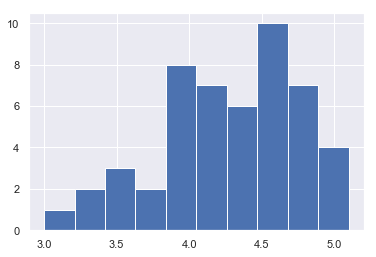

In [27]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

## Axis labels!

In the last exercise, you made a nice histogram of petal lengths of Iris versicolor, but you didn't label the axes! That's ok; it's not your fault since we didn't ask you to. Now, add axis labels to the plot using `plt.xlabel()` and `plt.ylabel()`. Don't forget to add units and assign both statements to _. The packages matplotlib.pyplot and seaborn are already imported with their standard aliases. This will be the case in what follows, unless specified otherwise.

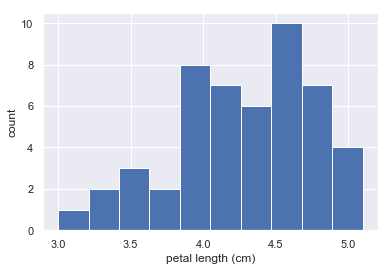

In [28]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')


# Show histogram
plt.show()

## Adjusting the number of bins in a histogram

The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: `choose the number of bins to be the square root of the number of samples`. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of `plt.hist()`.

The plotting utilities are already imported and the seaborn defaults already set. The variable you defined in the last exercise, versicolor_petal_length, is already in your namespace.

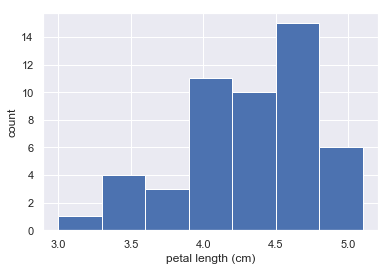

In [29]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

## Bee swarm plot

Make a **bee swarm plot** of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as `df`.

You can use `sns.swarmplot?` or `help(sns.swarmplot)` for more details on how to make bee swarm plots using seaborn.

In [40]:
df = pd.read_csv(path+'iris_dataset.csv', index_col=0)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
#sns.swarmplot?

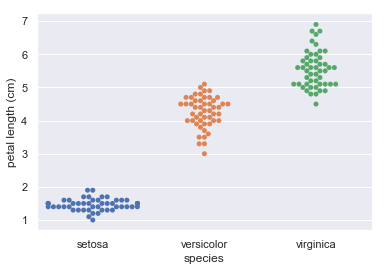

In [41]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species. Notice that we said "tend to be." Some individual I. virginica flowers may be shorter than individual I. versicolor flowers. It is also possible that an individual I. setosa flower may have longer petals than in individual I. versicolor flower, though this is highly unlikely, and was not observed by Anderson.

## Computing the ECDF (Empirical Cumulative Distribution Function)

In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the **ECDF (Empirical Cumulative Distribution Function)**. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis.

In [42]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Plotting the ECDF

You will now use your `ecdf()` function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to **unpack** them. An example of such unpacking is `x, y = foo(data)`, for some function `foo()`.

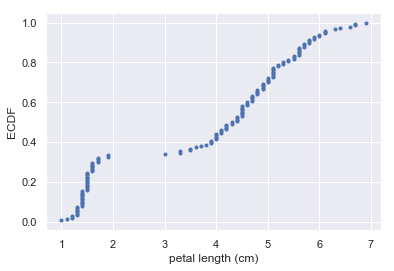

In [43]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(df['petal length (cm)'])

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')


# Display the plot
plt.show()

## Comparison of ECDFs

ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use `plt.plot()` three times, once for each ECDF. Remember to include `marker='.'` and `linestyle='none'` as arguments inside `plt.plot()`.

In [45]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
# df[df['species'] == 'setosa']['petal length (cm)']

In [52]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

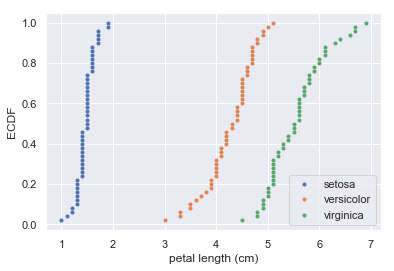

In [50]:
# Compute ECDFs
x_set, y_set = ecdf(df[df['species'] == 'setosa']['petal length (cm)'])
x_vers, y_vers = ecdf(df[df['species'] == 'versicolor']['petal length (cm)'])
x_virg, y_virg = ecdf(df[df['species'] == 'virginica']['petal length (cm)'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()